In [1]:
# Analyze the categories of the detected sites.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from consent.util.default_path import get_data_dir
from consent.consistency.util import FIG_DIR

In [2]:
DATA_DIR = get_data_dir('2022-06-07')  # '2022-01-14')

In [3]:
def read_cat_data():
    dfs = []
    for csv_file in sorted(DATA_DIR.glob("*.csv")):
        # print(f"Read {csv_file.name}")
        dfs.append(pd.read_csv(csv_file, na_values=['None', '-']))
    print("Number of csv files processed:", len(dfs))
    return pd.concat(dfs)
cat_data = read_cat_data().drop_duplicates()
cat_data.head()

Number of csv files processed: 10


,provider,domain,categorization
0,fortiguard,100percentpure.com,Health and Wellness
1,fortiguard,101blockchains.com,Education
2,fortiguard,10faq.com,Health and Wellness
3,fortiguard,123helpme.com,Plagiarism
4,fortiguard,177milkstreet.com,Restaurant and Dining


In [4]:
providers = cat_data.provider.unique()
print("Providers:", providers)
print("Num sites:", cat_data.domain.nunique())

Providers: ['fortiguard']
Num sites: 4973


In [5]:
# Which provider is the best.
for provider in providers:
    site_cats = cat_data[cat_data.provider == provider].dropna()
    print(provider, len(site_cats))

fortiguard 4866


In [6]:
provider = 'fortiguard'  # 'mcafee' 
site_cats = cat_data[cat_data.provider == provider].dropna()
site_cats['cats'] = site_cats['categorization'].map(lambda cat_str: [acat.strip() for acat in cat_str.split('-') if acat.strip()])
sites = site_cats.explode('cats')
sites = sites[['domain', 'cats']].drop_duplicates().sort_values(by='domain')
sites

,domain,cats
0,100percentpure.com,Health and Wellness
1,101blockchains.com,Education
2,10faq.com,Health and Wellness
3,123helpme.com,Plagiarism
4,177milkstreet.com,Restaurant and Dining
...,...,...
3005,zscaler.com,Information Technology
3006,zumarestaurant.com,Restaurant and Dining
3007,zycus.com,Business
3008,zyte.com,Information Technology


Written to /home/ducbui/local_projects/consent/paper/sp22/figures/incor_site_category.pdf


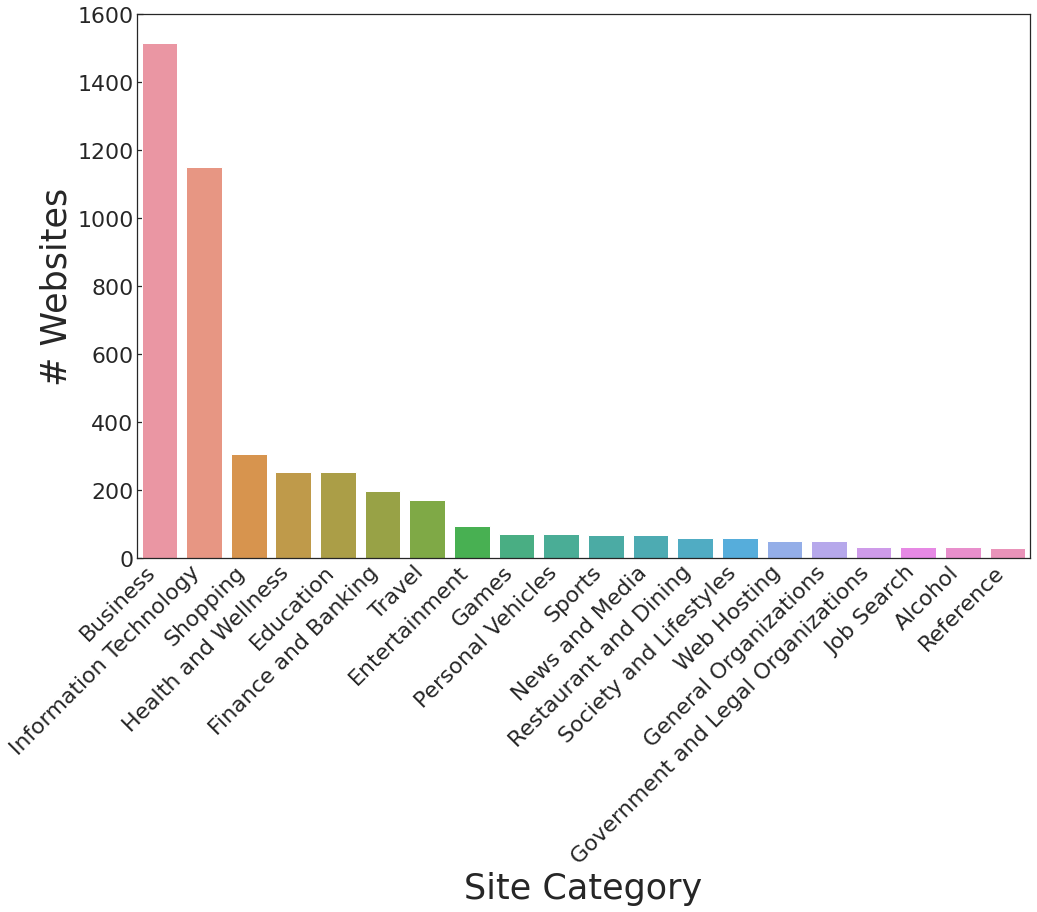

In [24]:
sns.set(rc={'figure.figsize':(16,10),"font.size":25,"axes.titlesize":25,"axes.labelsize":35},style="white", font_scale = 2)

vc = sites.cats.value_counts()
top_cats = vc.to_frame()[:20].reset_index().rename(columns={'index': 'category', 'cats': 'num_sites'})
ax = sns.barplot(x='category', y='num_sites', data=top_cats)
ticks = plt.xticks(rotation=45, ha='right')

ax.tick_params(left=True, bottom=False, direction="in")
ax.set_ylabel('# Websites')
ax.set_xlabel('Site Category')
ax.set(ylim=[0, 1600])

out_file = FIG_DIR / 'incor_site_category.pdf'; plt.savefig(out_file, dpi=200, bbox_inches='tight'); print(f"Written to {out_file}")

In [9]:
total = vc.sum()
top_cats['percent'] = top_cats['num_sites'] / total * 100
top_cats

,category,num_sites,percent
0,Business,1515,31.064179
1,Information Technology,1150,23.580070
2,Shopping,305,6.253845
3,Health and Wellness,253,5.187615
4,Education,253,5.187615
5,Finance and Banking,196,4.018864
6,Travel,170,3.485749
7,Entertainment,94,1.927414
8,Games,71,1.455813
9,Personal Vehicles,70,1.435309


In [16]:
# sites[sites.cats == 'Business'].sample(50)

In [22]:
bus_sites = set(sites[sites.cats == 'Business'].domain)
'nic.travel' in bus_sites

True